In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from sklearn.ensemble import RandomForestRegressor
from keras.layers import Dense
from sklearn.tree import DecisionTreeRegressor

In [203]:
df = pd.read_csv('Data.csv', header=0)

In [204]:

# Add 100 random synthetic data to the dataframe
for i in range(500):
  df = df.append(df.sample(n=1), ignore_index=True)


C:\Users\joelt\AppData\Local\Temp\ipykernel_26376\2612582424.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df.sample(n=1), ignore_index=True)


In [205]:
df.drop(columns=['Timestamp'], inplace=True)

for col in df:
  if col != "Year of birth" and col != "number of people sharing the place with" and col != "Budget limit" and col != "Debts repayment amount" and col != "Healthcare" and col != "Rent" and col != "Groceries" and col != "Utilities" and col != "Entertainment" and col != "Insurance" and col != "Unexpected expenses" and col != "Other expanses":
    if col == 'Industry':
        df[col] = df[col].fillna('Other')
    df[col], labels = df[col].factorize()
  else:
    try:
      # Replace NaN values with 0
      if col == 'Debts repayment amount' or col == 'number of people sharing the place with' or col == 'Budget limit':
        df[col] = df[col].fillna(0)
      df[col], label = int(df[col])
    except:
      continue
    
df.head(10)


,Year of birth,Sex,Marital Status,Region,Living alone?,number of people sharing the place with,Employment status,Industry,Income,Expenses,...,Have debts,Debts repayment amount,Healthcare,Rent,Groceries,Utilities,Entertainment,Insurance,Unexpected expenses,Other expanses
0,2000,0,0,0,0,3.0,0,0,0,0,...,0,0.0,0,0,0,0,100,0,0,0
1,2000,0,0,1,0,2.0,0,0,1,1,...,0,0.0,0,0,150,200,100,0,0,0
2,2003,1,0,0,0,2.0,1,1,2,1,...,0,0.0,50,500,1000,2000,1000,20,1000,500
3,2004,0,0,1,0,4.0,1,1,2,2,...,0,0.0,40,0,300,150,50,40,20,30
4,2000,0,0,0,0,4.0,0,0,3,3,...,0,0.0,100,0,500,300,2000,200,100,100
5,1989,0,0,2,1,1.0,0,2,0,4,...,1,400.0,0,300,200,0,200,0,100,200
6,2000,1,0,1,0,4.0,0,0,4,5,...,1,300.0,50,0,100,100,100,35,50,50
7,2000,1,0,0,0,4.0,0,2,2,2,...,0,0.0,20,0,0,0,10,0,5,10
8,2002,1,0,3,0,4.0,1,1,2,2,...,0,0.0,0,0,0,0,15,0,0,0
9,2005,0,0,4,1,0.0,1,1,2,2,...,1,200.0,50,0,60,0,14,20,0,40


In [206]:
df.corr()

,Year of birth,Sex,Marital Status,Region,Living alone?,number of people sharing the place with,Employment status,Industry,Income,Expenses,...,Have debts,Debts repayment amount,Healthcare,Rent,Groceries,Utilities,Entertainment,Insurance,Unexpected expenses,Other expanses
Year of birth,1.000000,0.207910,-0.081552,0.279413,-0.065876,0.203670,0.321368,-0.012262,-0.069533,0.056972,...,0.059099,-0.098147,0.180245,-0.051376,0.160040,0.194923,-0.053495,0.106971,-0.045078,0.237793
Sex,0.207910,1.000000,-0.307361,-0.125341,-0.500682,0.537609,-0.304793,0.295236,0.160508,0.123136,...,-0.099069,-0.067978,0.138421,0.059084,0.056782,0.142889,-0.141234,0.006032,0.137729,0.169160
Marital Status,-0.081552,-0.307361,1.000000,-0.246256,0.384673,-0.355278,0.675260,0.332276,-0.100557,0.119384,...,-0.108361,-0.104020,0.247937,0.103473,-0.097767,-0.048083,-0.109270,-0.122491,-0.078544,-0.137752
Region,0.279413,-0.125341,-0.246256,1.000000,0.436642,-0.269961,0.102381,-0.196608,-0.185218,-0.042167,...,0.460134,0.363678,-0.206858,-0.032038,-0.006599,-0.166601,0.036963,0.071713,-0.177901,-0.124244
Living alone?,-0.065876,-0.500682,0.384673,0.436642,1.000000,-0.713584,0.491677,0.031881,-0.189940,0.142064,...,0.385668,0.336457,0.023813,0.036521,-0.027798,-0.153448,0.026668,-0.053913,-0.176694,-0.040842
number of people sharing the place with,0.203670,0.537609,-0.355278,-0.269961,-0.713584,1.000000,-0.246806,-0.153813,0.059421,-0.239644,...,-0.217162,-0.164958,0.276973,-0.406927,-0.102648,0.024315,-0.086340,0.091029,-0.076160,0.300685
Employment status,0.321368,-0.304793,0.675260,0.102381,0.491677,-0.246806,1.000000,-0.043371,-0.294318,0.024936,...,-0.052994,-0.113939,0.233669,0.013185,0.055121,0.087926,-0.073688,-0.149529,0.013023,0.110371
Industry,-0.012262,0.295236,0.332276,-0.196608,0.031881,-0.153813,-0.043371,1.000000,0.254770,0.222598,...,-0.231959,-0.216978,0.023172,0.192131,-0.174108,-0.175740,-0.221918,-0.087907,-0.136708,-0.218379
Income,-0.069533,0.160508,-0.100557,-0.185218,-0.189940,0.059421,-0.294318,0.254770,1.000000,0.199075,...,-0.094139,-0.111680,0.036832,-0.028491,0.001799,-0.091154,-0.034698,0.171563,-0.053283,-0.123765
Expenses,0.056972,0.123136,0.119384,-0.042167,0.142064,-0.239644,0.024936,0.222598,0.199075,1.000000,...,0.267935,0.327863,-0.114837,0.547260,0.033590,-0.191111,-0.066640,0.033953,-0.057836,-0.038206


In [207]:
# Split to feature and result cols
feature_cols = ['number of people sharing the place with', 'Employment status', 'Income', 'Marital Status', 'Industry']
result_cols = ['Expenses']
X = df[feature_cols]
y = df[result_cols]

In [208]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [209]:
# define the model
model = Sequential()
model.add(Dense(128, input_shape=(5,), activation='relu'))  # input layer
model.add(Dense(64, activation='relu'))                     # hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))                                         # output layer

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs=300)
###################################################
# model = RandomForestRegressor()
#
# model.fit(X=X_train, y=y_train)
###################################################
# model = DecisionTreeRegressor(random_state=42)
#
# model.fit(X=X_train, y=y_train)

Epoch 1/300
14/14 [==============================] - 1s 955us/step - loss: 5.3038
Epoch 2/300
14/14 [==============================] - 0s 939us/step - loss: 2.2419
Epoch 3/300
14/14 [==============================] - 0s 1ms/step - loss: 1.8703
Epoch 4/300
14/14 [==============================] - 0s 1ms/step - loss: 1.5753
Epoch 5/300
14/14 [==============================] - 0s 1ms/step - loss: 1.4390
Epoch 6/300
14/14 [==============================] - 0s 1ms/step - loss: 1.3174
Epoch 7/300
14/14 [==============================] - 0s 1ms/step - loss: 1.2067
Epoch 8/300
14/14 [==============================] - 0s 933us/step - loss: 1.1123
Epoch 9/300
14/14 [==============================] - 0s 1ms/step - loss: 0.9717
Epoch 10/300
14/14 [==============================] - 0s 987us/step - loss: 0.8187
Epoch 11/300
14/14 [==============================] - 0s 974us/step - loss: 0.7655
Epoch 12/300
14/14 [==============================] - 0s 1ms/step - loss: 0.6899
Epoch 13/300
14/14 [=======

In [210]:
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

# # print(list(zip(y_test, y_pred)))
# print(y_test[:1])
# print(y_pred)


4/4 [==============================] - 0s 1ms/step
Mean Squared Error: 0.09829423924221256
Mean Absolute Error: 0.13673401341118194
R2 Score: 0.9536353928129583


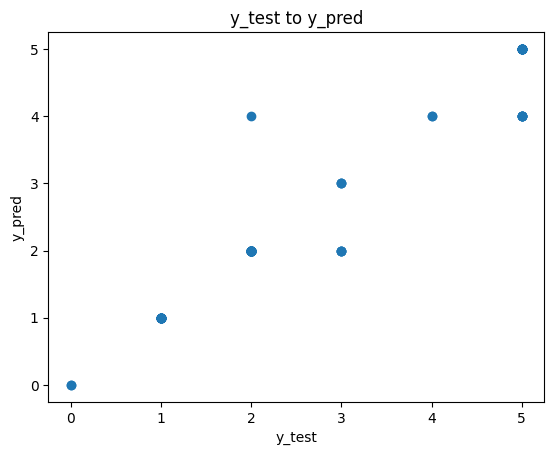

In [211]:
# round y_pred to the nearest integer

new_y_pred = [round(n - 0.05) for n in np.nditer(y_pred)]
plt.scatter(y_test, new_y_pred, marker='o')
plt.title('y_test to y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [212]:
# import pickle
#
# # Save the model
# filename = 'finalized_model_v2.sav'
# pickle.dump(model, open(filename, 'wb'))



In [213]:
print(X_test.head())

     number of people sharing the place with  Employment status  Income  \
486                                      3.0                  1       2   
73                                       3.0                  1       2   
349                                      1.0                  0       3   
86                                       5.0                  0       4   
457                                      4.0                  0       2   

     Marital Status  Industry  
486               0         1  
73                0         1  
349               0         6  
86                0         6  
457               0         2  
